In [29]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.spatial import distance


In [30]:
data = '''id,X,Y,Class
1,39,23,1
2,68,16,0
3,58,42,1
4,15,55,0
5,13,49,0
6,16,18,0
7,48,84,0
8,21,30,1
9,66,95,0
10,61,45,1'''

In [31]:
df = pd.read_csv(io.StringIO(data), index_col ='id')

In [32]:
NewObject= np.array([67,43])

(0.0, 90.0)

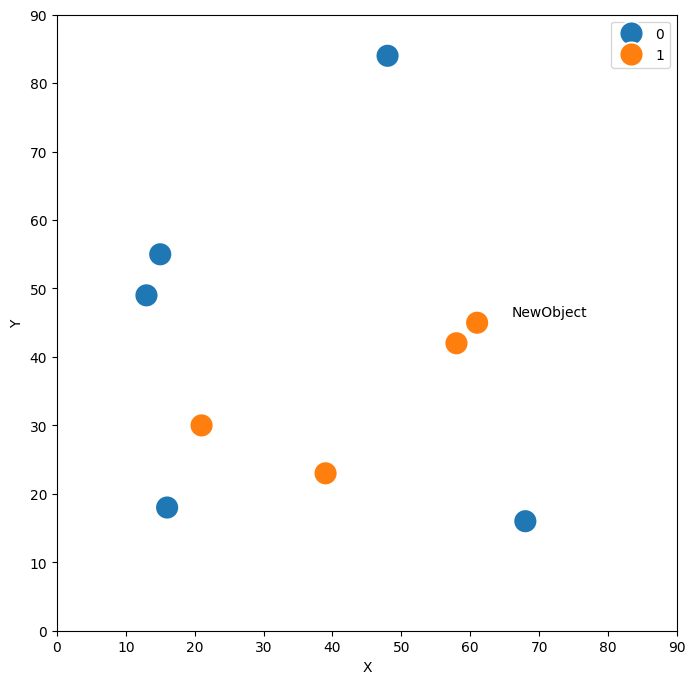

In [33]:
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[1]], marker='o', s=600,color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1,   NewObject[1]+3), fontsize=10)
plt.xlim(0, 90)
plt.ylim(0, 90)

In [34]:
p=2
df['Distance']=[distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:, :2].iterrows()]
df

,X,Y,Class,Distance
id,,,,
1,39,23,1,34.409301
2,68,16,0,27.018512
3,58,42,1,9.055385
4,15,55,0,53.366656
5,13,49,0,54.332311
6,16,18,0,56.797887
7,48,84,0,45.188494
8,21,30,1,47.801674
9,66,95,0,52.009614


In [35]:
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k=3
ids, dists=neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
10,61,45,1,6.324555
3,58,42,1,9.055385
2,68,16,0,27.018512


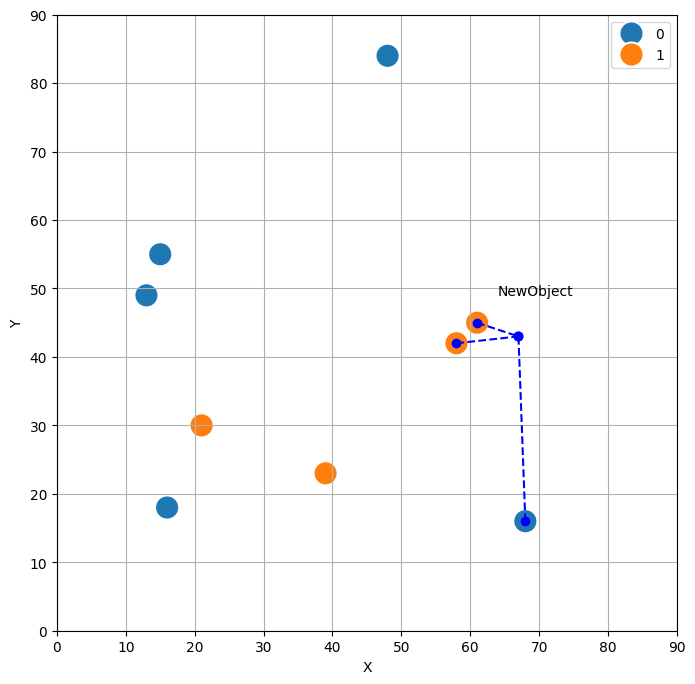

In [36]:
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[1]], marker='o', s=600,color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-3,   NewObject[1]+6), fontsize=10)
plt.xlim(0, 90)
plt.ylim(0, 90)
for i, item in df.loc[ids].iterrows():
  x_values = [item['X'], NewObject[0]]
  y_values = [item['Y'], NewObject[1]]
  plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

In [ ]:
# p=1
# df['Distance']=[distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:, :2].iterrows()]
# def neighbors(k):
  # return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
# k=3
# ids, dists=neighbors(k)
# df.loc[ids]

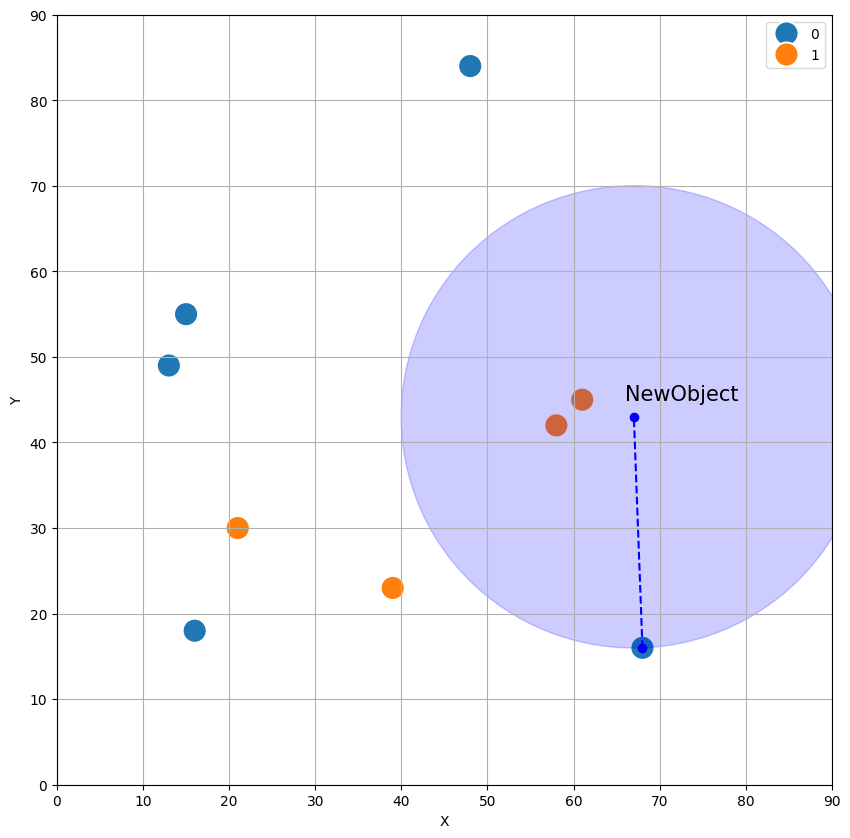

In [37]:
from matplotlib.patches import Circle
plt.rcParams['figure.figsize']=(10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[1]], marker='o', s=600,color='black')

plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1,   NewObject[1]+2), fontsize=15)
circle1=plt.Circle((NewObject[0], NewObject[1]), dists[k-1], color='b', alpha=0.2)
plt.gca().add_patch(circle1)
plt.xlim(0, 90)
plt.ylim(0, 90)
x_values = [df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], NewObject[1]]
plt.plot(x_values, y_values, 'bo', linestyle='--')
plt.grid(True)

In [38]:
p=1
df['Distance']=[distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:, :2].iterrows()]
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k=3
ids, dists=neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
10,61,45,1,8.0
3,58,42,1,10.0
2,68,16,0,28.0


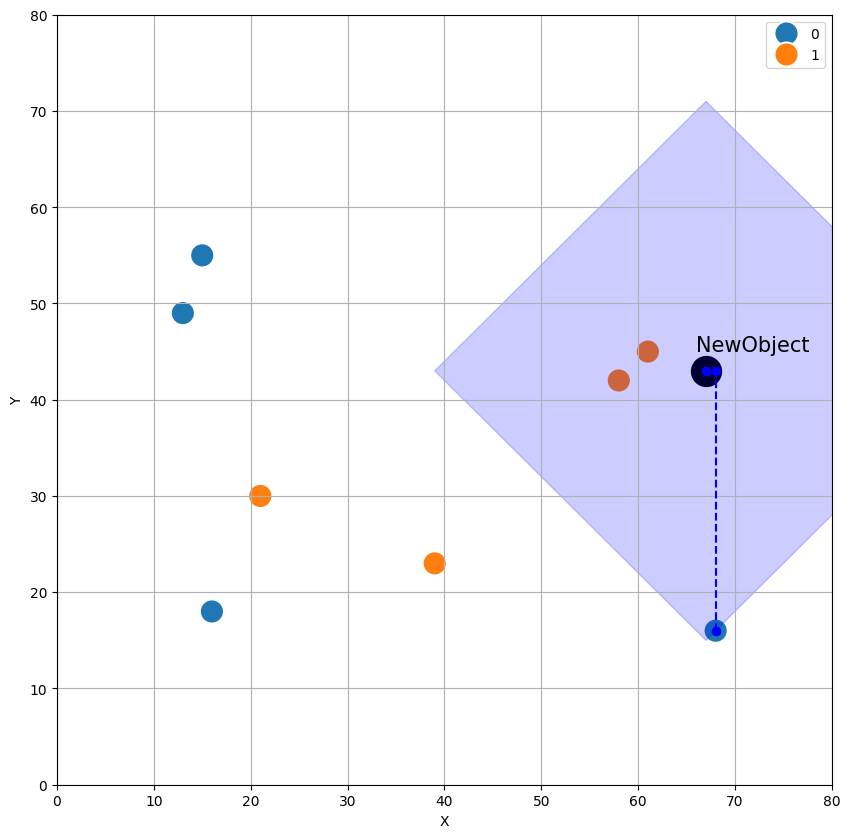

In [39]:
from matplotlib.patches import Polygon
polygon_dots = np.array([[NewObject[0]+dists[k-1], NewObject[1]], [NewObject[0], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]], [NewObject[0], NewObject[1]-dists[k-1]]])
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)

polygon1 = plt.Polygon(polygon_dots, color='b', alpha=0.2)
plt.gca().add_patch(polygon1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], NewObject[1], NewObject[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

In [40]:
df['Distance'] = [distance.chebyshev(obj, NewObject) for index, obj in df.iloc[:,:2].iterrows()]
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df

,X,Y,Class,Distance
id,,,,
1,39,23,1,28
2,68,16,0,27
3,58,42,1,9
4,15,55,0,52
5,13,49,0,54
6,16,18,0,51
7,48,84,0,41
8,21,30,1,46
9,66,95,0,52


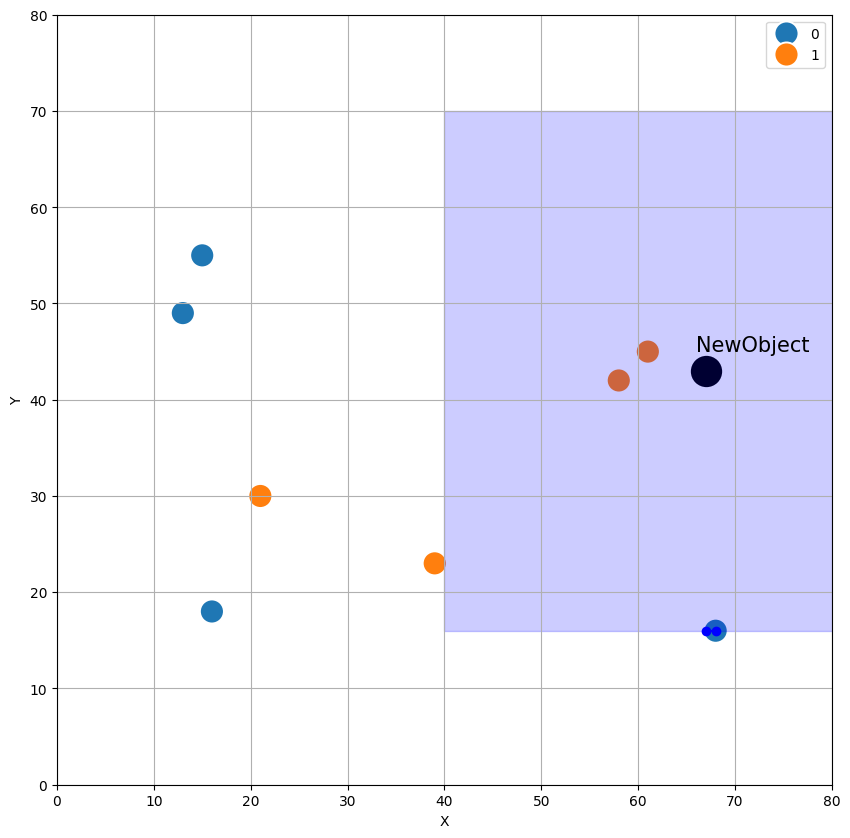

In [41]:
from matplotlib.patches import Polygon
polygon_dots = np.array([[NewObject[0]+dists[k-1], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]-dists[k-1]], [NewObject[0]+dists[k-1], NewObject[1]-dists[k-1]]])
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
polygon1 = plt.Polygon(polygon_dots, color='b', alpha=0.2)
plt.gca().add_patch(polygon1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], df.loc[ids[k-1]]['Y']]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)